# Modeling Complex Ecosystem Dynamics and Particle Movement in a Simulated Lake Environment

## Importing necessary Python libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## NumPy (np)
### Functionality: 
1. Fundamental package for numerical & scientific computations in Python.
2. Efficient manipulation of large arrays and matrices.

## Matplotlib (plt)
### Functionality:
1. A 2D plotting library for creating static, interactive, and animated visualizations in Python.
2. Creates line plots, scatter plots, bar plots and histograms.


## Parameters to be studied and visualised

### Let's provide a brief overview of the parameters under study.

### Basic Parameters:
1. num_cells: Represents the number of cells or grid points in the simulation domain. Increasing no of cells can lead to higher computational complexity but finer spatial resolution.
2. num_time_steps: Indicates the number of time steps the simulation will run for. A larger no of time_steps can capture longer-term system behavior but might require more computation.
3. diffusion_coefficient: Reflects how substances spread or diffuse through the medium. Higher diffusion coefficient can lead to faster spreading of substances.
4. wind_speed_base: Represents the base wind speed affecting the system. Increasing the base wind speed can amplify the impact of wind-driven processes.

### Density-driven Flow Parameters:
1. density_coefficient: Determines the influence of density differences in fluid flow. A higher density coefficient can result in stronger flow variations due to density differences.
2. gravity: Represents the acceleration due to gravity, impacting the density-driven flow. Greater gravity can lead to more pronounced vertical movements in the fluid.

### Heat Source Parameters:
1. heat_source_center: Defines the center of the heat source in the simulation. The heat source center influences where the heat impacts the system most.
2. heat_source_strength: Indicates the intensity of the heat source. Increasing the heat source strength can lead to higher temperature gradients and more intense localized effects.

### Pollution Source Parameters:
1. pollution_source_center: Specifies the center of the pollution source. The pollution_source_center determines the focal point of pollution dispersion..
2. pollution_source_strength: Indicates the strength or amount of pollution being released. Higher pollution source strength can increase contamination levels in the affected area.
3. pollution_source_time: Refers to the time step when pollution source is active.

### Nutrient and Algae Parameters:
1. initial_nutrient_concentration: Represents the starting concentration of nutrients. A higher initial nutrient concentration can boost initial algae growth.
2. nutrient_decay_rate: Reflects the rate at which nutrients degrade over time. Increasing nutrient decay rate accelerates nutrient depletion over time.
3. max_algae_growth_rate: Indicates the maximum rate at which algae can grow. Raising maximum algae growth rate can result in faster exponential algae population growth.
4. nutrient_algae_interaction: Represents the effect of nutrients on algae growth. Stronger nutrient algae interaction indicates a more sensitive dependence of algae growth on nutrient levels

### Sediment Parameters:
1. sediment_concentration: Represents the initial concentration of sediment in cells. 
2. sediment_deposition_rate: Indicates the rate at which sediment settles. Higher sediment deposition rate can lead to faster accumulation of sediment.
3. sediment_resuspension_rate: Represents the rate at which sediment is stirred up. Increasing sediment resuspension rate can enhance sediment disturbance in the water column.

### Vertical Stratification Parameters:
1. thermal_mixing_depth: Represents the depth at which stratification breaks due to mixing. A larger thermal mixing depth allows for deeper mixing before stratification breaks.
2. mixing_coefficient: Controls the strength of vertical mixing in the system. Higher mixing coefficient results in more vigorous vertical mixing and reduced stratification.

### Phytoplankton Parameters:
1. phytoplankton_density: Represents the initial density of phytoplankton. Increasing phytoplankton density can lead to greater competition for resources and potential shifts in the ecosystem.
2. max_phytoplankton_growth_rate: Indicates the maximum rate of phytoplankton growth. Raising maximum phytoplankton growth rate can result in faster algal blooms under favorable conditions.
3. phytoplankton_nutrient_half_saturation: Reflects the nutrient level at which growth is halved. Higher phytoplankton nutrient half saturation indicates phytoplankton's sensitivity to nutrient availability.

### Oxygen Parameters:
1. oxygen_concentration: Represents the initial oxygen concentration. 
2. oxygen_production_rate: Indicates the rate at which oxygen is produced. A higher oxygen production rate can enhance oxygen levels through photosynthesis.
3. oxygen_consumption_rate: Represents the rate at which oxygen is consumed. Increasing oxygen consumption rate can lead to faster depletion of oxygen, especially in oxygen-demanding environments.

### Particle Tracking Parameters:
1. num_particles: Specifies the number of particles for tracking. A larger no. of particles provides a more comprehensive view of particle dispersion but requires more computation.
2. particle_positions: Contains initial positions of the particles. The initial particle position influences the starting points for tracking and observing particle movement.

### These parameters collectively define the characteristics and behavior of the simulated system. They allow researchers and modelers to understand and analyze complex interactions within the system and observe how changes in one parameter can influence the overall dynamics of the system over time.


In [2]:
# Basic Parameters
num_cells = int(input("Enter the number of cells (>= 1), eg 50: "))
num_time_steps = int(input("Enter the number of time steps (>= 1), eg 200: "))
diffusion_coefficient = float(input("Enter the diffusion coefficient (0.0 - 1.0), eg 0.01: "))
wind_speed_base = float(input("Enter the wind speed base, eg 0.05: "))

# Density-driven flow parameters
density_coefficient = float(input("Enter the density coefficient (0.0 - 1.0), eg 0.01: "))
gravity = float(input("Enter the gravity value (>= 0), eg 9.81: "))

# Heat source parameters
heat_source_center_x = int(input(f"Enter the x-coordinate of heat source center (0 - {num_cells - 1}): "))
heat_source_center_y = int(input(f"Enter the y-coordinate of heat source center (0 - {num_cells - 1}): "))
heat_source_strength = float(input("Enter the heat source strength: "))

# Pollution source parameters
pollution_source_center_x = int(input(f"Enter the x-coordinate of pollution source center (0 - {num_cells - 1}): "))
pollution_source_center_y = int(input(f"Enter the y-coordinate of pollution source center (0 - {num_cells - 1}): "))
pollution_source_strength = float(input("Enter the pollution source strength, eg 0.01: "))
pollution_source_time = int(input(f"Enter the pollution source time(1 - {num_time_steps}): "))

# Nutrient and Algae Parameters
initial_nutrient_concentration = float(input("Enter the initial nutrient concentration (>= 0): "))
nutrient_decay_rate = float(input("Enter the nutrient decay rate (0.0 - 1.0): "))
max_algae_growth_rate = float(input("Enter the maximum algae growth rate (>= 0): "))
nutrient_algae_interaction = float(input("Enter the nutrient-algae interaction, eg 0.0005: "))

# Sediment Parameters
sediment_deposition_rate = float(input("Enter the sediment deposition rate (>= 0): "))
sediment_resuspension_rate = float(input("Enter the sediment resuspension rate (>= 0): "))

# Vertical stratification parameters
thermal_mixing_depth = float(input("Enter the thermal mixing depth (>= 0): "))  # Depth where stratification begins to break
mixing_coefficient = float(input("Enter the mixing coefficient (>= 0): "))      # Controls vertical mixing strength

# Phytoplankton Parameters
max_phytoplankton_growth_rate = float(input("Enter the maximum phytoplankton growth rate (>= 0): "))
phytoplankton_nutrient_half_saturation = float(input("Enter the phytoplankton nutrient half-saturation (>= 0): "))

# Oxygen Parameters
oxygen_production_rate = float(input("Enter the oxygen production rate (>= 0): "))
oxygen_consumption_rate = float(input("Enter the oxygen consumption rate (>= 0): "))

# Particle Tracking Parameters
num_particles = int(input("Enter the number of particles (>= 1): "))
particle_positions = np.random.randint(0, num_cells, (num_particles, 2))

Enter the number of cells (>= 1), eg 50: 100
Enter the number of time steps (>= 1), eg 200: 500
Enter the diffusion coefficient (0.0 - 1.0), eg 0.01: 0.02
Enter the wind speed base, eg 0.05: 1
Enter the density coefficient (0.0 - 1.0), eg 0.01: 0.01
Enter the gravity value (>= 0), eg 9.81: 9.8
Enter the x-coordinate of heat source center (0 - 99): 30
Enter the y-coordinate of heat source center (0 - 99): 40
Enter the heat source strength: 0.05
Enter the x-coordinate of pollution source center (0 - 99): 40
Enter the y-coordinate of pollution source center (0 - 99): 30
Enter the pollution source strength, eg 0.01: 0.01
Enter the pollution source time(1 - 500): 100
Enter the initial nutrient concentration (>= 0): 1
Enter the nutrient decay rate (0.0 - 1.0): 0.02
Enter the maximum algae growth rate (>= 0): 0.01
Enter the nutrient-algae interaction: 0.0002
Enter the sediment deposition rate (>= 0): 0.001
Enter the sediment resuspension rate (>= 0): 0.01
Enter the thermal mixing depth (>= 0)

## Simulating Lake Circulation and Temperature Distribution with the help of time steps

### Let's provide a table to provide a sequential flow of steps and thir description.

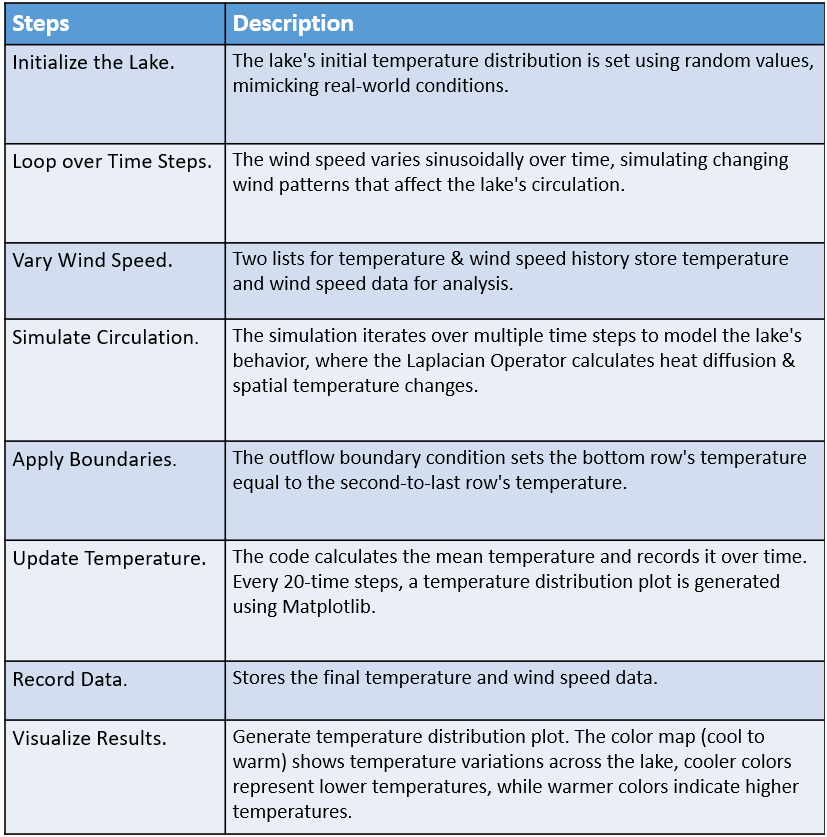

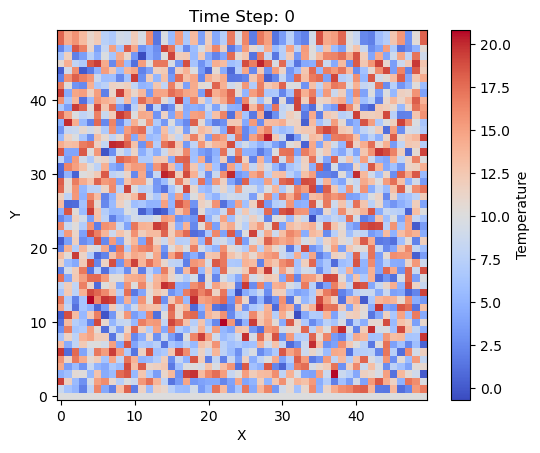

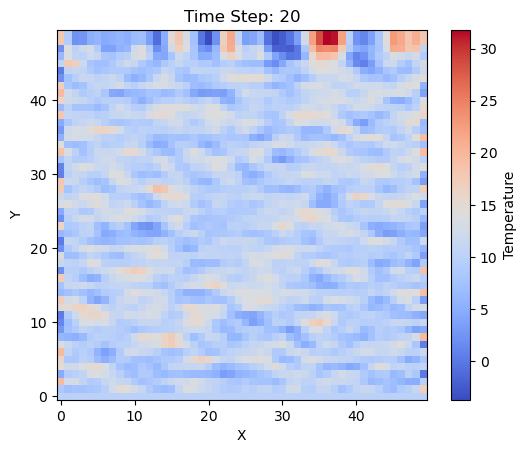

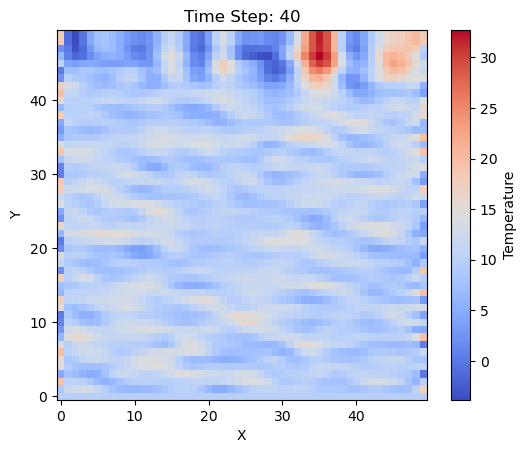

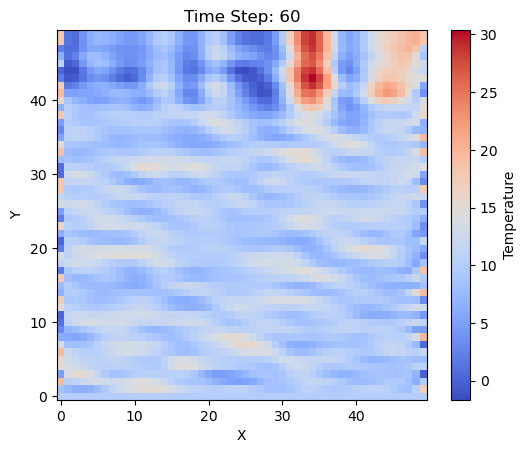

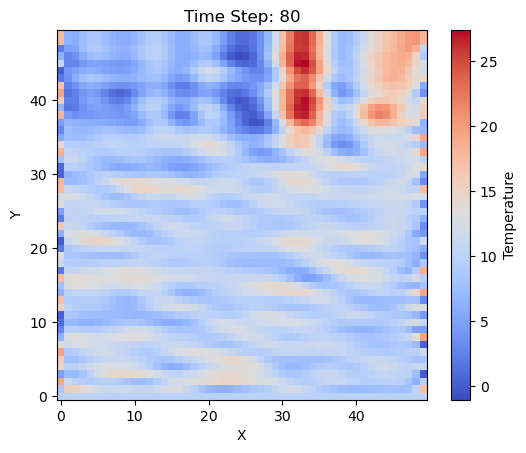

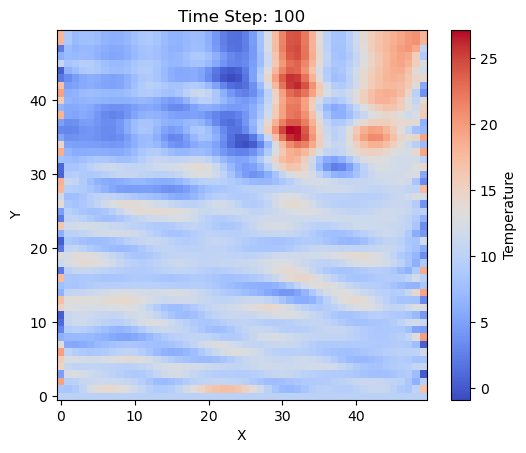

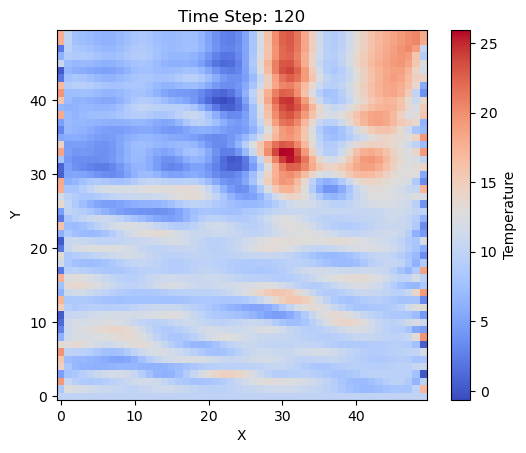

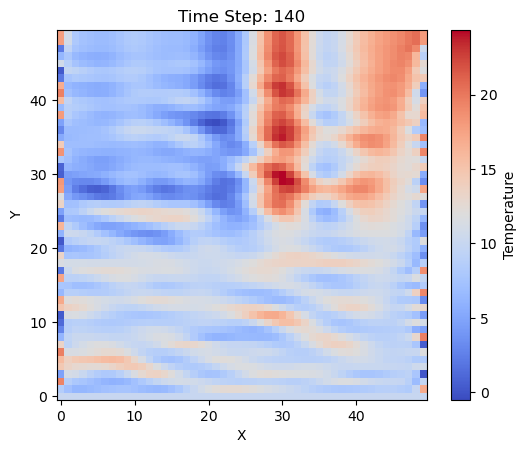

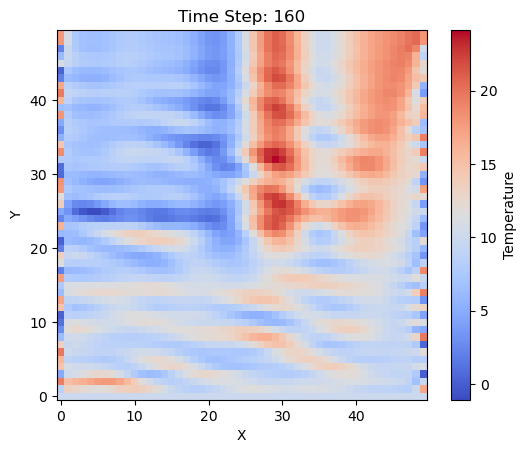

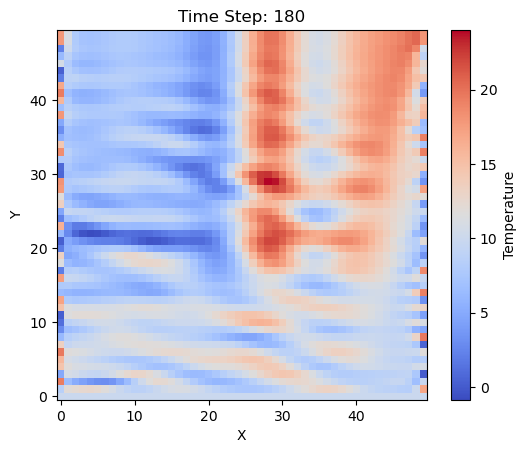

In [3]:
# Initialize the lake with an initial temperature distribution (based on actual data)
lake_temperature = np.random.uniform(0, 20, (num_cells, num_cells))
lake_temperature[0, :] = 10.0  # Inflow boundary condition

# Varying wind pattern (sinusoidal variation)
def wind_speed_variation(t):
    return wind_speed_base * (1 + 0.2 * np.sin(2 * np.pi * t / num_time_steps))

# Lists to store data for analysis
temperature_history = []
wind_speed_history = []

# Simulate lake circulation over time
for t in range(num_time_steps):
    wind_speed = wind_speed_variation(t)
    wind_speed_history.append(wind_speed)

    new_temperature = np.copy(lake_temperature)
    for i in range(1, num_cells - 1):
        for j in range(1, num_cells - 1):
            laplacian = (
                lake_temperature[i + 1, j]
                + lake_temperature[i - 1, j]
                + lake_temperature[i, j + 1]
                + lake_temperature[i, j - 1]
                - 4 * lake_temperature[i, j]
            )

            advection_term = wind_speed * (lake_temperature[i, j + 1] - lake_temperature[i, j])

            density_term = (
                (lake_temperature[i + 1, j] - lake_temperature[i - 1, j])
                * density_coefficient
                * gravity
            )

            heat_source_term = (
                heat_source_strength
                if (i, j) == heat_source_center
                else 0
            )

            pollution_source_term = (
                pollution_source_strength
                if (i, j) == pollution_source_center
                else 0
            )

            new_temperature[i, j] = (
                lake_temperature[i, j]
                + diffusion_coefficient * laplacian
                + advection_term
                + density_term
                + heat_source_term
                + pollution_source_term
            )

    # Outflow boundary condition
    new_temperature[-1, :] = new_temperature[-2, :]
    lake_temperature = new_temperature
    temperature_history.append(np.mean(lake_temperature))

    # Plot temperature distribution
    if t % 20 == 0:
        plt.imshow(lake_temperature, cmap="coolwarm", origin="lower")
        plt.colorbar(label="Temperature")
        plt.title(f"Time Step: {t}")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()



## Plot and visualise avg. Temperature & Wind Speed variation over time

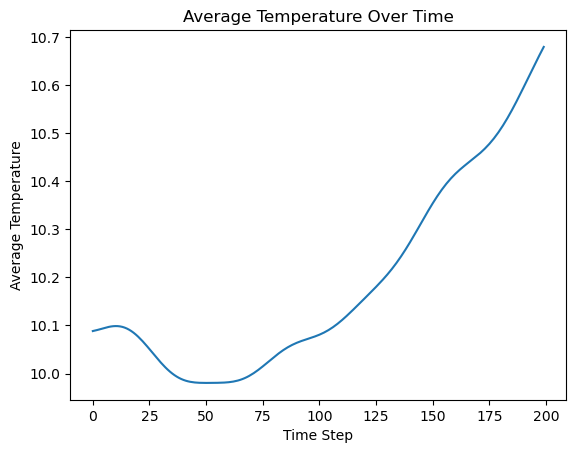

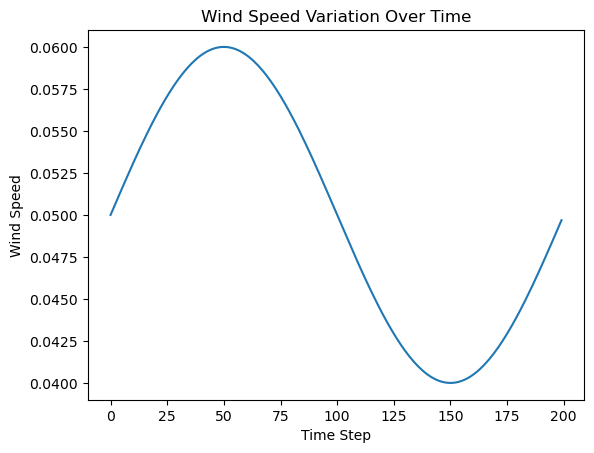

In [4]:
# Plot temperature over time
plt.plot(temperature_history)
plt.title("Average Temperature Over Time")
plt.xlabel("Time Step")
plt.ylabel("Average Temperature")
plt.show()

# Plot wind speed over time
plt.plot(wind_speed_history)
plt.title("Wind Speed Variation Over Time")
plt.xlabel("Time Step")
plt.ylabel("Wind Speed")
plt.show()


## Exploring Nutrient Dynamics and Algae Growth in a Lake Ecosystem

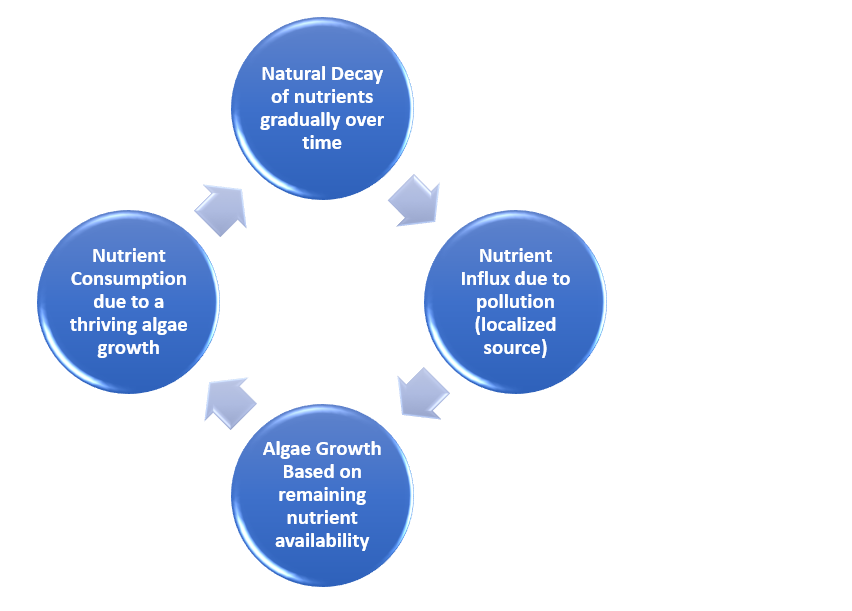

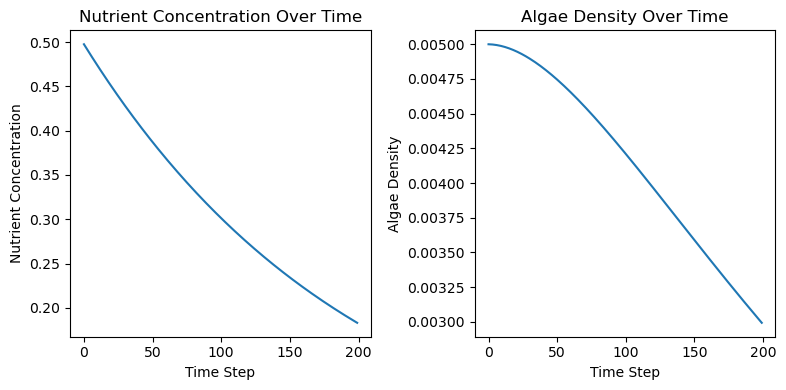

In [5]:
nutrient_concentration_history = []
algae_density_history = []

# Simulate lake dynamics over time
for t in range(num_time_steps):
    
    # Nutrient decay
    initial_nutrient_concentration -= nutrient_decay_rate * initial_nutrient_concentration

    # Nutrient source (pollution)
    if (pollution_source_center[0] == pollution_source_center[1] == -1):
        # Continuous source across the lake
        initial_nutrient_concentration += pollution_source_strength
    else:
        # Point source
        initial_nutrient_concentration += (
            pollution_source_strength
            if (pollution_source_center[0], pollution_source_center[1]) == (i, j)
            else 0
        )

    # Algae growth based on nutrient availability
    max_growth = max_algae_growth_rate * (1 - initial_nutrient_concentration)
    algae_growth = max_growth * initial_nutrient_concentration

    # Nutrient consumption due to algae growth
    initial_nutrient_concentration -= nutrient_algae_interaction * algae_growth

    # Update algae density
    algae_density = algae_growth

    # Store data for analysis
    nutrient_concentration_history.append(initial_nutrient_concentration)
    algae_density_history.append(algae_density)

# Plot nutrient concentration, and algae density over time
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(nutrient_concentration_history)
plt.title("Nutrient Concentration Over Time")
plt.xlabel("Time Step")
plt.ylabel("Nutrient Concentration")

plt.subplot(132)
plt.plot(algae_density_history)
plt.title("Algae Density Over Time")
plt.xlabel("Time Step")
plt.ylabel("Algae Density")

plt.tight_layout()
plt.show()


## Creating a Line Chart showing initial Nutrient Concentration decreasing over time

For the above code, we create another visualization to clearly depict in another way the nutrient dynamics and algae growth over time. We simulate nutrient decay over time using the nutrient_decay_rate parameter. We also introduce a pollution source at a specified time step (pollution_source_time) using the pollution_source_strength parameter. The line chart displays the initial nutrient concentration decreasing over time and includes a red dashed line representing the time when the pollution source is active. 

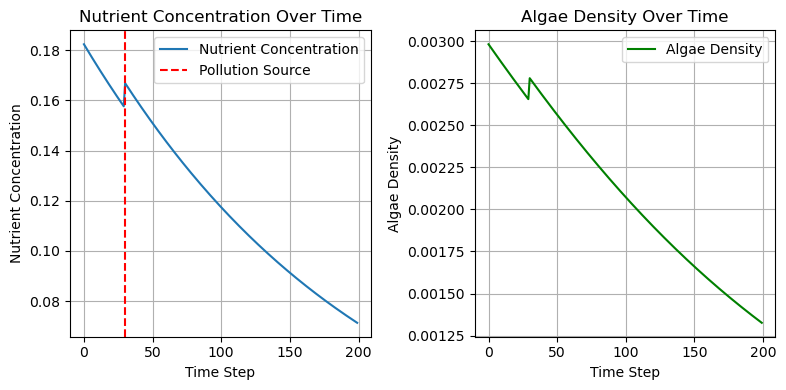

In [6]:
# Lists to store data for plotting
time_steps = list(range(num_time_steps))
nutrient_concentration = []
algae_density = []

# Simulate nutrient decay and pollution source
for t in range(num_time_steps):
    # Decay nutrient concentration
    initial_nutrient_concentration -= nutrient_decay_rate * initial_nutrient_concentration
    
    # Add pollution source at specified time step
    if t == pollution_source_time:
        initial_nutrient_concentration += pollution_source_strength
    
    # Calculate algae growth and nutrient consumption
    max_growth = max_algae_growth_rate * (1 - initial_nutrient_concentration)
    algae_growth = max_growth * initial_nutrient_concentration
    initial_nutrient_concentration -= nutrient_algae_interaction * algae_growth
    
    # Update algae density
    algae_density.append(algae_growth)
    
    # Store nutrient concentration data
    nutrient_concentration.append(initial_nutrient_concentration)

# Plot nutrient concentration and algae density over time
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(time_steps, nutrient_concentration, label="Nutrient Concentration")
plt.xlabel("Time Step")
plt.ylabel("Nutrient Concentration")
plt.title("Nutrient Concentration Over Time")
plt.axvline(x=pollution_source_time, color='r', linestyle='--', label="Pollution Source")
plt.annotate("Pollution Source", xy=(pollution_source_time, 0.2), xytext=(pollution_source_time + 10, 0.3),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
plt.legend()
plt.grid()

plt.subplot(132)
plt.plot(time_steps, algae_density, label="Algae Density", color='green')
plt.xlabel("Time Step")
plt.ylabel("Algae Density")
plt.title("Algae Density Over Time")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


## Simulate & plot Sedimentation Concentration History over time revealing trends in Sediment Dynamics for Ecosystem Insight.

### Sediment Concentration:
Sediment concentration refers to the amount of solid particles suspended in the water column of a lake or any aquatic environment. These particles can include sand, silt, clay, and organic matter. Sediment concentration is a critical aspect of aquatic ecosystems and can influence water quality, habitat availability, and overall ecological health.

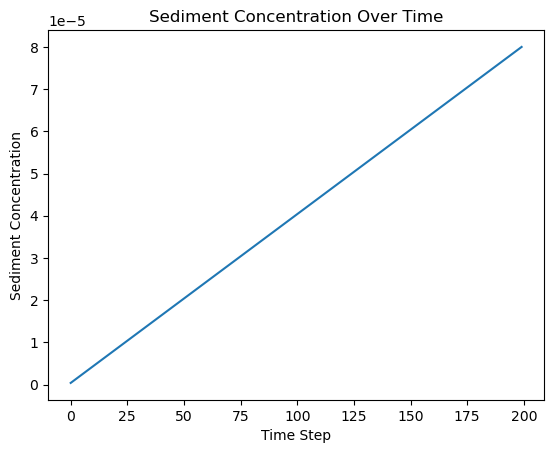

In [7]:
sediment_concentration_history = []

# Simulate lake dynamics over time
for t in range(num_time_steps):

    # Sediment transport and deposition
    sediment_concentration[i, j] += (
        sediment_concentration[i, j] * sediment_resuspension_rate
    )
    sediment_concentration[0, j] += sediment_deposition_rate

    # Store data for analysis
    sediment_concentration_history.append(np.mean(sediment_concentration))

# Plot sediment concentration over time
plt.plot(sediment_concentration_history)
plt.title("Sediment Concentration Over Time")
plt.xlabel("Time Step")
plt.ylabel("Sediment Concentration")

plt.show()


## Exploring Phytoplankton Growth and Oxygen Dynamics in a Lake Ecosystem

### The code simulates the interaction between phytoplankton growth and oxygen concentration in a lake ecosystem.

1. Phytoplankton are crucial primary producers in aquatic ecosystems, converting nutrients into organic matter through photosynthesis.

2. Phytoplankton influence oxygen concentration through photosynthetic oxygen production and subsequent oxygen consumption in their life cycle.

3. The balance between oxygen production and consumption by phytoplankton significantly impacts the overall health of the ecosystem.

4. The simulation demonstrates the intricate interplay between phytoplankton growth, nutrient availability, oxygen dynamics and phytoplankton's pivotal role in maintaining equilibrium within the environment .

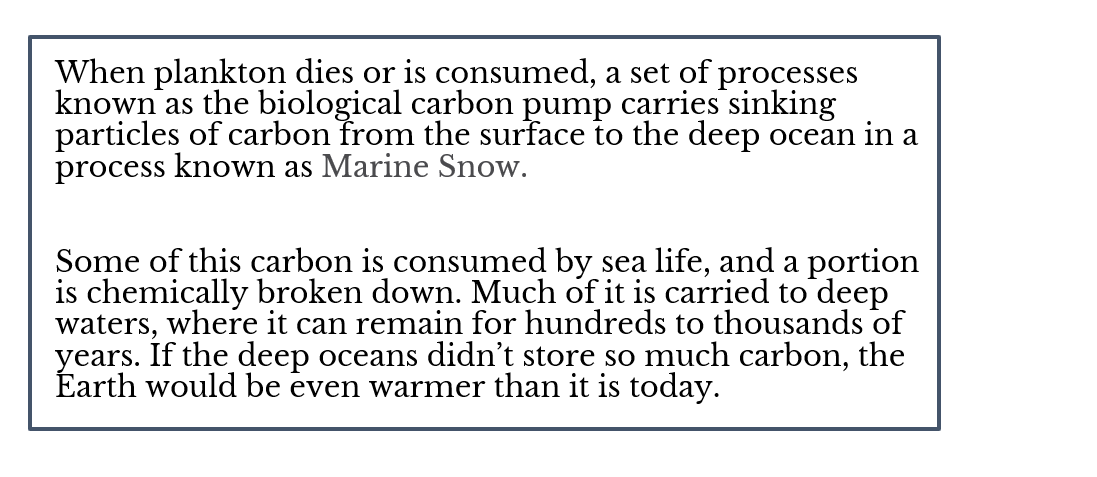

Citation: Copyright © 2010–2023, The Conversation

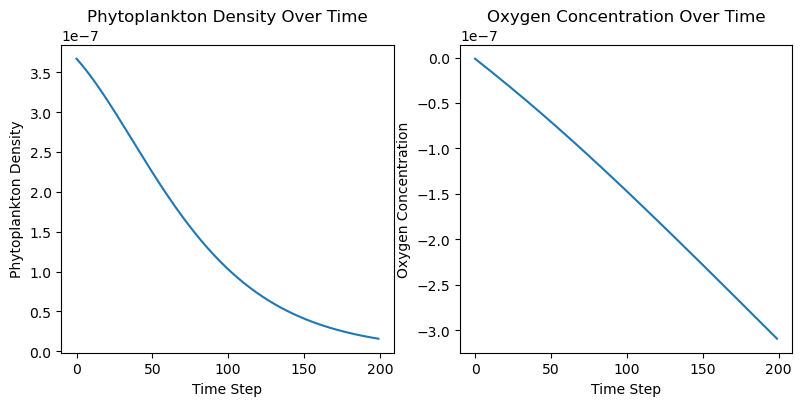

In [8]:
# Lists to store data for analysis
phytoplankton_density_history = []
oxygen_concentration_history = []

# Simulate lake dynamics over time
for t in range(num_time_steps):

    # Phytoplankton growth and nutrient uptake
    max_growth = max_phytoplankton_growth_rate * (1 - initial_nutrient_concentration / phytoplankton_nutrient_half_saturation)
    phytoplankton_growth = max_growth * initial_nutrient_concentration

    # Nutrient consumption due to phytoplankton growth
    initial_nutrient_concentration -= phytoplankton_growth

    # Update phytoplankton density
    phytoplankton_density[i, j] = phytoplankton_growth

    # Oxygen production and consumption
    oxygen_production = oxygen_production_rate * phytoplankton_density[i, j]
    oxygen_consumption = oxygen_consumption_rate * np.mean(algae_density)

    # Update oxygen concentration
    oxygen_concentration[i, j] += oxygen_production - oxygen_consumption

    # Store data for analysis
    phytoplankton_density_history.append(np.mean(phytoplankton_density))
    oxygen_concentration_history.append(np.mean(oxygen_concentration))

# Plot phytoplankton density, and oxygen concentration over time
plt.figure(figsize=(30,4))

plt.subplot(165)
plt.plot(phytoplankton_density_history)
plt.title("Phytoplankton Density Over Time")
plt.xlabel("Time Step")
plt.ylabel("Phytoplankton Density")

plt.subplot(166)
plt.plot(oxygen_concentration_history)
plt.title("Oxygen Concentration Over Time")
plt.xlabel("Time Step")
plt.ylabel("Oxygen Concentration")

#plt.tight_layout()
plt.show()


## Exploring Particle Tracking and Lake Dynamics with Wind Effects

- **Particle Tracking:** particle tracking is a method used to simulate the movement of particles in a fluid, such as water in a lake. Particles can represent various entities like pollutants, nutrients, or even microorganisms. 

- **Advection and Diffusion:** Advection is the movement of particles due to the bulk motion of the fluid, such as wind-driven currents. Diffusion, on the other hand, represents the random movement of particles due to concentration gradients. Combining these effects leads to the spreading and dispersion of particles in the fluid.

- **Mathematical Formulation:** The code utilizes mathematical formulations to model these processes. For example, the Laplacian operator (`laplacian`) calculates the second derivative of temperature to capture heat distribution. The advection term (`advection_term`) incorporates wind speed's effect on heat transfer. The density term (`density_term`) considers the density-driven flow due to temperature differences.

- **Vertical Mixing:** Vertical mixing is introduced through the `mixing_term`. When the vertical position is below the `thermal_mixing_depth`, vertical mixing is accounted for. This simulates the breakdown of thermal stratification, promoting mixing due to temperature differences.

- **Particle Movement:** The `particle_positions` represent the positions of particles in the lake. Wind-driven advection and random diffusion influence their movement. The particles' positions are updated based on wind effects (`advection_x`, `advection_y`) and diffusion (`diffusion_x`, `diffusion_y`). This mimics how particles disperse in response to environmental forces.

- **Particle Tracking Visualization:** The code concludes by visualizing particle tracking. The `particle_positions_history` data is plotted to showcase the trajectory of particles over time. The scatter plot demonstrates how particles disperse and move in response to the lake's dynamic processes.

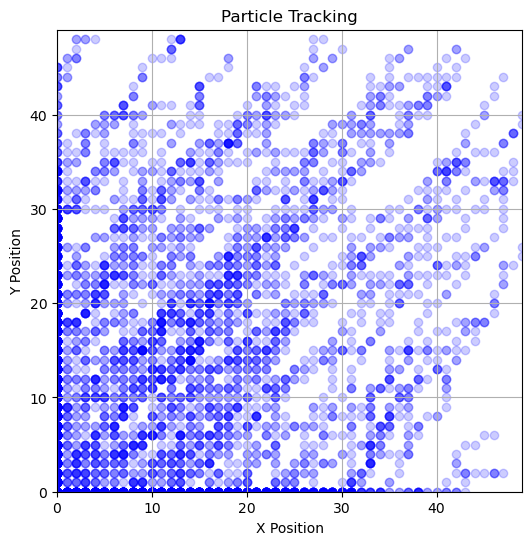

In [9]:
# Lists to store data for analysis
particle_positions_history = []

# Varying wind pattern (sinusoidal variation)
def wind_speed_variation(t):
    return wind_speed_base * (1 + 0.2 * np.sin(2 * np.pi * t / num_time_steps))

# Simulate lake dynamics over time
for t in range(num_time_steps):
    wind_speed = wind_speed_variation(t)

    new_temperature = np.copy(lake_temperature)
    for i in range(1, num_cells - 1):
        for j in range(1, num_cells - 1):
            laplacian = (
                lake_temperature[i + 1, j]
                + lake_temperature[i - 1, j]
                + lake_temperature[i, j + 1]
                + lake_temperature[i, j - 1]
                - 4 * lake_temperature[i, j]
            )

            advection_term = wind_speed * (lake_temperature[i, j + 1] - lake_temperature[i, j])

            density_term = (
                (lake_temperature[i + 1, j] - lake_temperature[i - 1, j])
                * density_coefficient
                * gravity
            )

            # Vertical mixing
            mixing_term = 0
            if i >= thermal_mixing_depth:
                delta_temperature = lake_temperature[i, j] - lake_temperature[i - 1, j]
                mixing_term = mixing_coefficient * delta_temperature

            new_temperature[i, j] = (
                lake_temperature[i, j]
                + diffusion_coefficient * laplacian
                + advection_term
                + density_term
                + mixing_term
            )
    
    # Outflow boundary condition
    new_temperature[-1, :] = new_temperature[-2, :]
    lake_temperature = new_temperature

    # Update particle positions based on advection and diffusion
    for k in range(num_particles):
        x, y = particle_positions[k]
        advection_x = wind_speed * (x - particle_positions[k, 0])
        advection_y = wind_speed * (y - particle_positions[k, 1])
        diffusion_x = np.random.normal(0, diffusion_coefficient)
        diffusion_y = np.random.normal(0, diffusion_coefficient)
        x = max(0, min(num_cells - 1, x + advection_x + diffusion_x))
        y = max(0, min(num_cells - 1, y + advection_y + diffusion_y))
        particle_positions[k] = [x, y]

    # Store data for analysis
    particle_positions_history.append(np.array(particle_positions))


# Particle tracking visualization
plt.figure(figsize=(6, 6))
for positions in particle_positions_history:
    x = positions[:, 0]
    y = positions[:, 1]
    plt.scatter(x, y, c='blue', alpha=0.2)
plt.title("Particle Tracking")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.xlim(0, num_cells - 1)
plt.ylim(0, num_cells - 1)
plt.grid()
plt.show()


## Additional Visualizations of Particle Tracking shown above

### Particle Displacement Histogram:

Analyze the displacement of particles over time by plotting a histogram of their displacements.

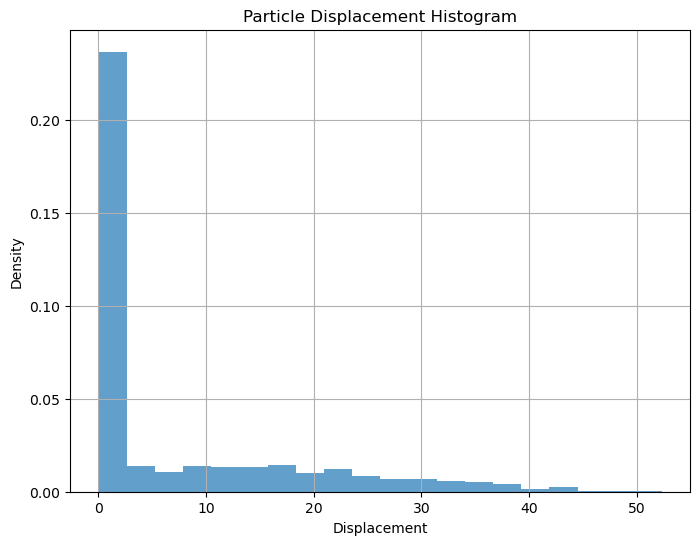

In [10]:
plt.figure(figsize=(8, 6))
particle_displacements = []
for positions in particle_positions_history:
    displacements = np.sqrt(np.diff(positions[:, 0]) ** 2 + np.diff(positions[:, 1]) ** 2)
    particle_displacements.extend(displacements)
plt.hist(particle_displacements, bins=20, density=True, alpha=0.7)
plt.title('Particle Displacement Histogram')
plt.xlabel('Displacement')
plt.ylabel('Density')
plt.grid()
plt.show()

### Particle Density Heatmap:

Visualize the concentration of particles using a heatmap to help provide a clearer representation of areas with higher particle density.

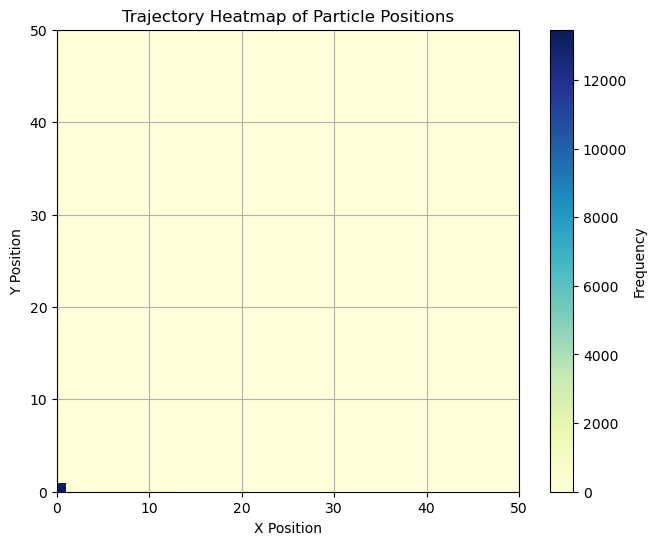

In [11]:
plt.figure(figsize=(8, 6))
heatmap = np.zeros((num_cells, num_cells))

for positions in particle_positions_history:
    x_indices = np.clip(positions[:, 0].astype(int), 0, num_cells - 1)
    y_indices = np.clip(positions[:, 1].astype(int), 0, num_cells - 1)
    for x, y in zip(x_indices, y_indices):
        heatmap[y, x] += 1

plt.imshow(heatmap, cmap='YlGnBu', origin='lower', extent=[0, num_cells, 0, num_cells])
plt.colorbar(label='Frequency')
plt.title('Trajectory Heatmap of Particle Positions')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid()
plt.show()


### Voronoi Diagram of Particle Trajectories:

The Voronoi diagram is like a map that shows us how different parts of the lake are claimed by particles, kind of like how animals have their own territories in nature. Imagine we have particles floating in the lake, and each particle claims the area closest to it as its own special zone.

Now, let's look at the Voronoi diagram we created:

1. Each point on the diagram represents a particle's position in the lake at a particular time.
2. The diagram draws lines to create boundaries around each particle's territory. Imagine these boundaries like fences that separate one particle's space from another's.
3. The color and transparency of these boundaries help us see where particles tend to move and cluster more frequently.

As we watch the diagram, we can notice some interesting things:

1. Some particles have bigger territories because they move around a lot and cover more ground.
2. Where two boundaries meet, it's like a neutral zone where particles from different territories can interact.
3. The diagram helps us see the flow of particles across the lake and how they explore different areas over time.

So, the Voronoi diagram gives us a unique way to look at how particles move in the lake and how they claim their own spaces, just like animals in the wild!

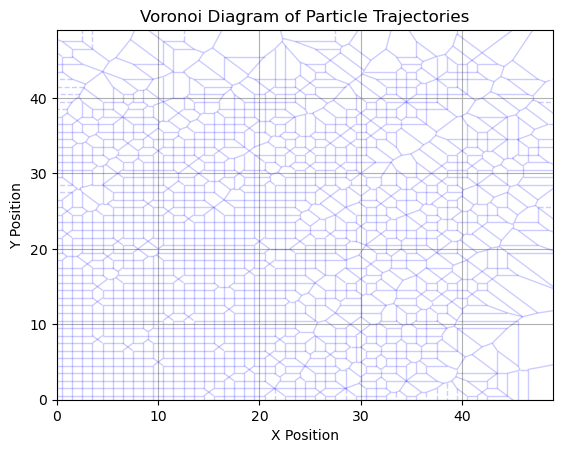

In [12]:
from scipy.spatial import Voronoi, voronoi_plot_2d

# Combine all particle positions into a single array
all_positions = np.concatenate(particle_positions_history)

# Create Voronoi diagram
vor = Voronoi(all_positions)

# Plot Voronoi diagram
voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='blue', line_alpha=0.2)
plt.title('Voronoi Diagram of Particle Trajectories')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.xlim(0, num_cells - 1)
plt.ylim(0, num_cells - 1)
plt.grid()
plt.show()
